# Problem Statementn: Design an LLM system which can recommend you the research papers based on the topic the user inputs

In [1]:
! pip install bertopic datasets openai datamapplot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.3 MB/s eta 0:00:00
  

We are using arxiv_nlp dataset from hugging_face

In [2]:
#Load datasets
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

#Extract Metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
# from datasets import load_dataset

# #Load dataset
# dataset = load_dataset("tweet_eval/sentiment")["train"]

# #Extract metadata
# abstracts = dataset["text"]
# titles = dataset["label"]

# #Mapping the sentiment labels as titles for better clarity
# sentiment_labels = ["negative", "neutral", "positive"]
# titles=[sentiment_labels[label] for label in titles]

# PIPELINE FOR TEXT CLUSTERING
1.   Embedding documents
2.   Dimensionality reduction
3.   Clustering



# 1. Embedding Documents

In [4]:
! pip install sentence_transformers

In [5]:
from sentence_transformers import SentenceTransformer

#create an embedding model
embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(abstracts, show_progress_bar = True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [6]:
embeddings.shape

(44949, 384)

# 2. Dimensionality Reduction (UMAP)

In [7]:
from umap import UMAP

#Reducing 384 dimensions to 5 dimensions

umap_model = UMAP(n_components =5, min_dist=0.0,metric='cosine', random_state =42)
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [8]:
print(reduced_embeddings.shape)

(44949, 5)


# 3. Cluster the Reduced Embeddings (HDBSCAN)

In [9]:
from hdbscan import HDBSCAN

# Fit the model and extract the clusters with eom = excess of mass
hdbscan_model =HDBSCAN(min_cluster_size =50, metric="euclidean", cluster_selection_method="eom").fit(reduced_embeddings)
clusters = hdbscan_model.labels_

print("Total Number of Clusters",len(set(clusters)))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Total Number of Clusters 161


In [10]:
# Inspecting the cluster 0
import numpy as np

cluster = 0
for index in np.where(cluster == clusters)[0][:3]:
    print(abstracts[index][:300]+"....\n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo....

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang....

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf....



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(44949, 2)


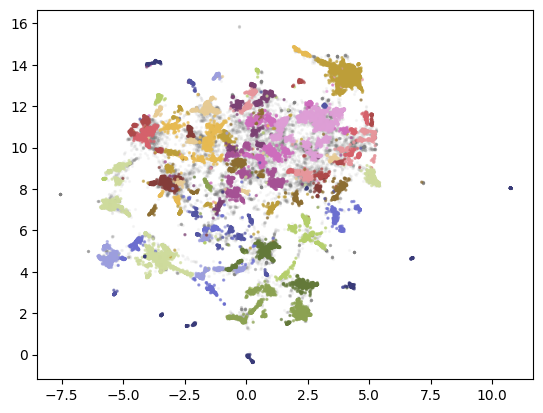

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 384 ---> 2
reduced_embeddings = UMAP(n_components =2, min_dist=0.0,metric='cosine', random_state =42).fit_transform(embeddings)
print(reduced_embeddings.shape)
df =pd.DataFrame(reduced_embeddings,columns=['x','y'])
df["title"] =titles
df["cluster"] = [str(c) for c in clusters]
# df.head()

clusters_df = df.loc[df.cluster!="-1",:]
outliers_df = df.loc[df.cluster=="-1",:]

plt.scatter(outliers_df.x, outliers_df.y,alpha=0.05, s=2,c="grey")
plt.scatter(clusters_df.x, clusters_df.y,alpha=0.6, s=2,c=clusters_df.cluster.astype("int"),cmap='tab20b')
plt.show()

# Topic Modelling

# BERT Topic
Leverages clusters of semantic similar texts to extract various types of topic representations

used bag of words(Tf-Idf for each cluster(document))

In [33]:
from bertopic import BERTopic

topic_model =BERTopic(embedding_model = embedding_model,
                      umap_model=umap_model,
                      hdbscan_model=hdbscan_model,
                      verbose =True
                      ).fit(abstracts, embeddings)

2025-03-18 16:37:17,645 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-18 16:38:22,296 - BERTopic - Dimensionality - Completed ✓
2025-03-18 16:38:22,299 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-18 16:38:24,371 - BERTopic - Cluster - Completed ✓
2025-03-18 16:38:24,383 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-18 16:38:28,238 - BERTopic - Representation - Completed ✓


In [13]:
topic_model.get_topic_info()

Topic  Count                                           Name  \
0       -1  14633                               -1_the_of_and_to   
1        0   2170                   0_speech_asr_recognition_end   
2        1   1513          1_medical_clinical_biomedical_patient   
3        2   1064                 2_translation_nmt_machine_bleu   
4        3    878  3_summarization_summaries_summary_abstractive   
..     ...    ...                                            ...   
156    155     52            155_gans_gan_adversarial_generation   
157    156     52  156_counterfactual_counterfactuals_cad_causal   
158    157     51    157_reviews_opinion_summaries_summarization   
159    158     51         158_sentence_embeddings_similarity_sts   
160    159     51   159_diffusion_generation_autoregressive_text   

                                        Representation  \
0    [the, of, and, to, in, we, that, for, language...   
1    [speech, asr, recognition, end, acoustic, spea...   
2    [medical, clinical, biomedical, patient, healt...   
3    [translation, nmt, machine, bleu, neural, engl...   
4    [summarization, summaries, summary, abstractiv...   
..                                                 ...   
156  [gans, gan, adversarial, generation, generativ...   
157  [counterfactual, counterfactuals, cad, causal,...   
158  [reviews, opinion, summaries, summarization, r...   
159  [sentence, embeddings, similarity, sts, embedd...   
160  [diffusion, generation, autoregressive, text, ...   

                                   Representative_Docs  
0    [  Large-scale generative language models such...  
1    [  We introduce the Universal Speech Model (US...  
2    [  Medical text learning has recently emerged ...  
3    [  Neural Machine Translation (NMT) has obtain...  
4    [  Abstractive summarization systems generally...  
..                                                 ...  
156  [  Text generation is of particular interest i...  
157  [  For text classification tasks, finetuned la...  
158  [  When faced with a large number of product r...  
159  [  Contextualized representations from a pre-t...  
160  [  Diffusion models have achieved great succes...  

[161 rows x 5 columns]

In [14]:
topic_model.get_topic(11)

[('parsing', np.float64(0.03967801369383817)),
 ('dependency', np.float64(0.032710961488645426)),
 ('parser', np.float64(0.026012674815417625)),
 ('parsers', np.float64(0.018759026736091304)),
 ('treebank', np.float64(0.015305575158615066)),
 ('trees', np.float64(0.014740535598763373)),
 ('transition', np.float64(0.014226095625658259)),
 ('treebanks', np.float64(0.012544037778110362)),
 ('constituency', np.float64(0.012129075646773438)),
 ('syntactic', np.float64(0.01172314878169218))]

In [15]:
topic_model.find_topics("topic_modelling")

([27, -1, 35, 1, 137],
 [np.float32(0.92183316),
  np.float32(0.8889982),
  np.float32(0.8839138),
  np.float32(0.88347393),
  np.float32(0.8769748)])

22 cluster has more similarity  with 92% and -1 is an outlier cluster

In [16]:
topic_model.topics_[titles.index("Attention Is All You Need")]

2

 Visualization

In [17]:
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings = reduced_embeddings,
    width = 1200,
    hide_annotations = True
)
fig.update_layout(font = dict(size=16))

In [18]:
topic_model.visualize_barchart()

topic_model.visualize_heatmap(n_clusters =30)

topic_model.visualize_hierarchy()

# Re-Ranking
Now we use a represntation model or Generative model to re-rank the keywords in each cluster. The reranker applies only once to each cluster

Representative models
*   KeyBERT
*   MMR
*   spaCy

We can stack these models one upon one also



In [27]:
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic

representation_model = KeyBERTInspired()

topic_model =BERTopic(representation_model=representation_model)

In [35]:
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)


In [31]:
def topic_differences(model, original_topics, nr_topics =5):
    "Shows the difference between 2 models"
    df =pd.DataFrame(columns=["Topic","Original","Updated"])
    for topic in range(nr_topics):
        og_words ="||".join(list(zip(*original_topics[topic]))[0][:5])
        up_words ="||".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[topic] = [topic, og_words, up_words]
    return df

#KeyBERT
preserves Semantic.

Find the average embeddings in a cluster and find cosine similarity between average embeddings and keyword embeddings of the cluster and the result is reranking of the keyword

In [37]:
import pandas as pd
from bertopic.representation import KeyBERTInspired

#Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)
#show topic differnces
topic_differences(topic_model,original_topics)

Topic                                           Original  \
0      0   phonetic||speech||language||encoder||translation   
1      1                nlp||ehr||clinical||annotated||text   
2      2  translation||translate||translated||translatio...   
3      3  summarization||summarizers||summaries||summary...   
4      4  hate||hateful||offensive||cyberbullying||language   

                                             Updated  
0   phonetic||speech||language||encoder||translation  
1                nlp||ehr||clinical||annotated||text  
2  translation||translate||translated||translatio...  
3  summarization||summarizers||summaries||summary...  
4  hate||hateful||offensive||cyberbullying||language

# Maximum Marginal Relevance (MMR)

Diversifies the topic representation

Filters redundant keywords only keeps those that contribute something new to topic representation. Algorithm finds a set of keywords which are not related to each other and relates only to the cluster. It does by iteratively selecting
each keyword and finding the next keyword to add.

In [38]:
from bertopic.representation import MaximalMarginalRelevance
#Update our topic representations using MMR
representation_model = MaximalMarginalRelevance(diversity=0.5)
topic_model.update_topics(abstracts, representation_model=representation_model)
topic_differences(topic_model,original_topics)

Topic                                           Original  \
0      0   phonetic||speech||language||encoder||translation   
1      1                nlp||ehr||clinical||annotated||text   
2      2  translation||translate||translated||translatio...   
3      3  summarization||summarizers||summaries||summary...   
4      4  hate||hateful||offensive||cyberbullying||language   

                                             Updated  
0               speech||asr||error||automatic||model  
1  clinical||biomedical||patient||healthcare||ext...  
2           translation||nmt||bleu||neural||parallel  
3  summarization||document||extractive||rouge||fa...  
4               hate||speech||toxic||social||abusive

# Using GENERATIVE MODELS instead of Representative models


In [40]:
from transformers import pipeline
from bertopic.representation import TextGeneration

prompt= """ I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords : '[KEYWORDS]'.
Based on the documents and keywords what is the topic about?
"""

generator = pipeline('text2text-generation',model ='google/flan-t5-small')
representation_model = TextGeneration(generator,prompt=prompt,doc_length =50, tokenizer="whitespace") #using a generative as representation
topic_model.update_topics(abstracts, representation_model=representation_model)

Device set to use cuda:0
100%|██████████| 161/161 [00:16<00:00,  9.70it/s]


In [41]:
topic_differnces(topic_model,original_topics)

Topic                                           Original  \
0      0   phonetic||speech||language||encoder||translation   
1      1                nlp||ehr||clinical||annotated||text   
2      2  translation||translate||translated||translatio...   
3      3  summarization||summarizers||summaries||summary...   
4      4  hate||hateful||offensive||cyberbullying||language   

                                   Updated  
0     Automated Speech Recognition||||||||  
1                     medical note||||||||  
2       Neural Machine Translation||||||||  
3  Summarization of text documents||||||||  
4                      Hate Speech||||||||